# CS 237 Fall 2019, HW 02 

### Due date: Thursday September 19th at 11:59 pm via Gradescope (6 hour grace period)

<strong> Late policy:</strong> You may submit the homework up to 24 hours late for a 10% penalty. Hence, the late deadline is Friday at 11:59 (with the same 6 hour grace period). 

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submittias a PDF file to Gradescope. See the submission instructions on the main page. 

There are 8 analytical problems and 4 programming problems. The programming problems will be covered next Monday in lab. 


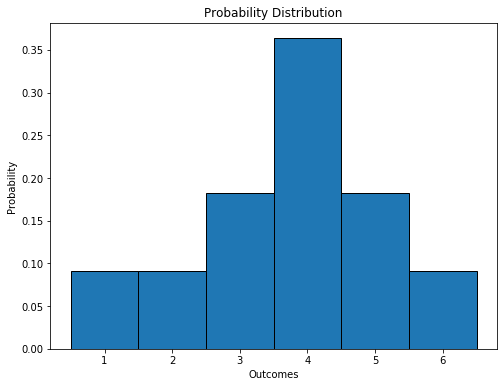

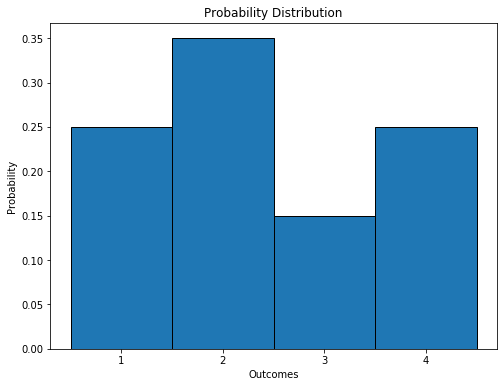

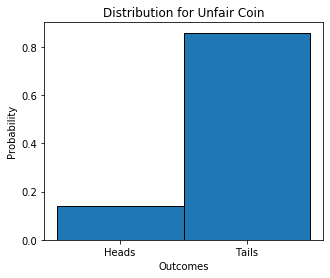

P(heads) = 0.1416


In [11]:
# Here are some imports which will be used in code that we write for CS 237

# Imports used for the code in CS 237

import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
import seaborn as sns             # Fancy plotting 
import pandas as pd               # Data input and manipulation

from math import log,pi                # or just import math and use anything there, conflicts with numpy?
from numpy.random import seed, randint, random
from collections import Counter

%matplotlib inline 

# Use this next function to round to 4 digits. 
# If the number is less than 0.00005 this will
# just produce 0.0000 so just print it normally. 
    
def round4(x):
    return round(x+0.00000000001,4)

def round4_list(L):
    return [ round4(x) for x in L]


# Useful code from HW 01

# This draws a useful bar chart for the distribution of the
# list of integers in outcomes

def show_distribution(outcomes, title='Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xticks != []:
        plt.xticks(X, my_xticks)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Example of use

show_distribution([1,4,3,5,4,6,2,4,3,5,4])

# This function takes a list of outcomes and a list of probabilities and
# draws a chart of the probability distribution.
# It allows labels for x axis with numbers or strings; for the latter, you
# still need to give the numeric labels, but can overwrite them with your string labels. 

def draw_distribution(Rx, fx, title='Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    plt.bar(Rx,fx,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if my_xticks != []:
        plt.xticks(Rx, my_xticks)
    elif (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)  
    plt.title(title)
    plt.show()
    
# Example of use
    
draw_distribution([1,2,3,4], [0.25,0.35,0.15,0.25])

p = 0.14159234368

draw_distribution( [0,1], [p,1.0-p],"Distribution for Unfair Coin", ['Heads','Tails'],(5,4))
    
print("P(heads) =", round4(p))    


## Analytical Problems

For the following problems, <i>analyze</i> means to specify 
<ol>
<li> The sample space S, 
<li> The probability function P, 
<li> The events specified (i.e.,list the members of each event), and
<li> The probability of each of the events. 
</ol>

In some cases, additional information may be required. You may abbreviate or schematize as necessary, as long as the answer is perfectly clear.

Sometimes it is useful to first write down a "pre-sample space" which helps to think about the actual sample space. This is often useful when the literal outcome of the random experiment is non-numeric but the sample space is numeric.

<strong>Example:</strong> Toss a fair coin (i.e., probably of heads is 0.5) and report the number of heads that appear. Let A = "one head appears." 
Analyze, providing the "pre-sample space" (the appearance of the two sides of the coin).

<strong>Solution:</strong>  The pre-sample space is { T, H }. Then:
       
           S = { 0,   1   }
           P = { 0.5, 0.5 }
           A = { 1 }
           P(A) = 0.5
           
           
NOTE:  <strong>Do NOT give answers in terms of fractions;</strong> they are impossible to grade. I will allow them on tests but not homeworks. 
We will not be too picky about the exact format of the decimals, but you have to make sure to show
at least three or four significant digits. Fine to just print them out with the default, but I tend to use
the <code>round4(...)</code> function provided above unless the number is less than about 0.01 (one percent), where
the rounding will eliminate too many significant digits.    You need at least 3 significant digits, but
I usually provide 4.  

Punchline: I use the <code>round4(...)</code> function, and then remove it if the result is less than 0.01
and I only get 2 significant digits. 

Here are examples:

In [2]:
print("These are all fine:")
print("0.01 =>", 0.01)
print("round4(0.0123456789) =>", round4(0.0123456789))
print("round4(pi) =>", round4(pi))              # I imported pi from the math library
print("pi =>",pi)
print("pi/100000 =>",pi/100000)
print("\nThese are not, you may be marked off:")
print("round4(pi/100000) =>",round4(pi/100000))
print("round4(0.009834) =>",round4(0.009834))

These are all fine:
0.01 => 0.01
round4(0.0123456789) => 0.0123
round4(pi) => 3.1416
pi => 3.141592653589793
pi/100000 => 3.141592653589793e-05

These are not, you may be marked off:
round4(pi/100000) => 0.0
round4(0.009834) => 0.0098


### Problem 1

Suppose that a study is being done on all families with 1, 2, or 3 children (all having different ages, i.e., no twins), and let the outcomes be the genders (G = girl and B = boy) of the children in each family in ascending order of their ages (e.g., BG means an older girl and a younger boy). Assume all possible configurations of genders and numbers of children is equally likely (i.e., this will be an equiprobable probability space). Let events A = "families where the oldest child is a boy" and B = "families with exactly two girls and any number of boys." Analyze. (No pre-sample space necessary.)

Solution:  
S = {G,B, GG, BB, BG, GB, GGG, GGB, GBG, BGG, GBB, BGB, BBG, BBB}
P= 1/14
A = {B,BB,GB,BBB,BGB,GBB,GGB} 
B = {GG,GGB,GBG,BGG}
P(A) = 7/14 = 1/2 = 0.5
P(B) = 4/14 = 2/7 = 0.2857



### Problem 2

Suppose that each time Wayne charges an item to his credit card, he rounds the amount to the nearest dollar in his records (assume that for x dollars, the amount x.50 is rounded to x + 1 dollars). The round-off error is defined as (recorded - actual); the units are dollars, so if Wayne charges $\$\$4.25$, he records it as $\$4$, and the round-off error is $\$-0.25$, but if he charges $\$4.75$, the value recorded is $\$5$ and the round-off error is $\$0.25$. Assume this is random, so that each time Wayne charges to his card, he performs a  random experiment whose outcome is the round-off error. Assume the outcomes are equiprobable. 

Let event A = "at most 3 cents is rounded off in either direction" (i.e., | recorded - actual | ≤ 0.03). Analyze. (No pre-sample space necessary.)

Solution:  
S = {-0.49,...,+0.50} 
P = {1/100}
A = {-0.03,-0.02,-0.01,0.00,0.01,0.02,0.03}
P(A) = 7/100 = 0.07


### Problem 3

Suppose you flip 3 fair coins and count the number of heads showing. Let A = "the number of heads showing is 2" 
and B = "the number of heads showing is odd." Give the pre-sample space (the three outcomes for each coin, e.g., HTH). Analyze. 
Hint: the pre-sample space has equiprobable sample points, but the sample space (the number of heads) does not. 

Solution: 
The pre-sample space is {HHH,HHT,HTH,THH,HTT,THT,TTH,TTT}. Then:
S = {0,1,2,3}
P = {1/8,3/8,3/8,1/8}
A = {2}
B = {1,3}
P(A) = 3/8 = 0.375
P(B) = 1/2 = 0.5


### Problem 4

Consider the random experiment of flipping a fair coin until a head appears. The result of the random experiment is the number of flips. Let A = "it takes an odd number of flips." Give the probability P(A). Show your reasoning, don't just give the answer. 

Hint: compare the sequence of probabilities in the case of an odd number of flips, and the sequence of probabilities in the case of an even number. There is a simple relationship between them.  You will use the "subtract one infinite sum from another infinite sum" method which you should have learned in CS 131.  

Solution:
S = {1,2,3,4...n}
P = {1/2, 1/4, 1/8... 1/2^n}
A = {1,3,5}
P(A) = {1/2, + 1/8...+1/2^2n+1}
p(Ac) = {1/2,1/4...,1/2^2n}

1/2P(a) = P(Ac)
P(A) + P(Ac) = 1
P(Ac) = 1 - P(A)
1/2P(A) = 1 - P(A)
We set x to be P(A) so...
1/2P(A) = 1 - P(A) = 1/2X = 1 - x
1/2x + x = 1
3/2x = 1
x = 2/3
So...
P(A) = 2/3 = 0.6667



### Problem 5

 Consider the formula: $P( ( A ∩ B^c ) ∪ ( A^c ∩ B ) ) = P(A) + P(B) - 2*P(A ∩ B)$. (This is called the "symmetric difference.")

Draw a Venn Diagram illustrating this formula before you start to give yourself intuition; no need to provide this diagram in your answer. 

Then, prove this formula using the axiomatic method described in lecture (you may use any of the formulae that I proved in class as lemmas in your proof if you wish--you do not need to restate the proofs I gave).
Be sure to give formal justification for each step. 

Hint: Look for a disjoint union so that you can employ axiom $P_3$. 

Solution: 
A-B = (𝐴∩𝐵𝑐)
B-A = (𝐴𝑐∩𝐵)
P((A-B)∪(B-A)) = P(conjunction/shaded region)
P(A)+P(B)-2(𝐴∩𝐵)

Axiom = P(A) = P(𝐴∩𝐵𝑐) + P(𝐴∩𝐵)
P(𝐴∩𝐵𝑐) + P(𝐴𝑐∩𝐵)=P(A)+P(B) - 2P(𝐴∩𝐵)



### Problem 6

Supposing you shuffle the deck thoroughly and draw a single card, give the probability that the card is:

(a) the King of Diamonds

(b) a black card 

(c) not a face card (i.e., not Jack, Queen, King) 

(d) a spade or an Ace (hint: remember that or in English is the "inclusive or" not the "exclusive or")


A diagram of all the cards in a deck of playing cards may be found <a href="http://www.cs.bu.edu/fac/snyder/cs237/images/PlayingCards.png">here</a>.

Solution:
Sample Space = 52
a)1/52 = 0.0192
b)1/2 = 0.5
c)40/52 = 10/13 = 0.7692
d)13/52 + 3/52 = 16/52 = 4/13 = 0.3077

for d) it is 3/52 because we counted ace of spades already
                                                           


### Problem 7

Suppose we throw a dart at a square target 1 meter on a side, which has a bullseye in the center of radius 0.1 meters. Assume the dart lands with equal probability anywhere inside the square target. Give the probabilities of the following events:

(a) The dart lands inside the bullseye;

(b) The dart lands within 0.1 meter of an edge of the square target (i.e., the shortest distance from the dart to the closest edge is ≤ 0.1m);

(c) The dart EITHER lands in the top half of the target (i.e., the shortest distance from the dart to 
the top edge is ≤ 0.5 m) OR inside the bullseye. 

(d) The dart lands in the exact center of the square (equivalently, in the exact center of the bullseye).

Solution: 
a)(pi(0.1)^2)/1 = 0.01*pi = 0.03141
b)(0.2+(0.1)(0.8)+(0.1)*(0.8))/1 = 0.36
c)0.01*4=0.04
d)0.0/1=0 (cannnot have infinite precision) 


### Problem 8

Suppose we consider the random experiment of randomly choosing a real number x in the range [0..1) for example using a spinner as discussed in class. Give the probability of the following events occurring.

  (a) x is larger than 0.5 but smaller than 0.61 (probability problems are often written, unfortunately, in English, so you have to translate, in this case into "0.5 < x < 0.61")

  (b) x is larger than or equal to 0.5 but smaller than 0.61 (i.e., 0.5 ≤ x < 0.61)

  (c) x is one of the exact values 0.1, 0.3, 0.5, or 0.545

  (d) x is one of the values in the infinite list 0.1, 0.11, 0.111, 0.1111, etc. (a finite sequence of 1s)

  (e) x is a rational number (can be expressed as a fraction)

Hint: Consider the role of Axiom $P_3$ in (c), (d), and (e).

Solution: 
a)(0.61-0.5)/1= 11/100 = 0.11
b)(0.61-0.5)/1 = 11/100 = 0.11
c)0 # Not sure
d)0 
e)0


## Lab Problems

These problems will be discussed in Lab on Monday; you of course may work on them before then, but
if you are not absolutely sure how to proceed, you should delay that part to the lab. 



## Problem Nine: Generating Random Floating-Point Numbers in [0..1)
In this problem we will investigate how to implement our own version of the <code>function random.random()</code>, which generates random 32-bit floating-point numbers in the range [0..1). 

<b>Hash functions</b> 
As you may recall from CS 112, hash functions map key values to buckets/bins in a hash table: the hash function appears to be spreading the keys uniformly randomly over the buckets, but in fact there is nothing random about it, since we can easily repeat the computation to find the key later. This is called <i>pseudo-random</i> behavior: the hash function is not random, but appears to be so unless you know the rule used to compute the hash function. 

The simplest hash functions use the linear-congruential method, which you may remember from CS 112 (Google it if you are unsure whether you studied this); using prime numbers as multiplier and modulus is a good (but not perfect) way to simulate random behavior. The particular choices we will use here are from <a href="http://www.ams.org/journals/mcom/1999-68-225/S0025-5718-99-00996-5/S0025-5718-99-00996-5.pdf"> this </a> paper. 

In [12]:
a = 914334          
m = 2**22 - 3

#a = 3           # You will use these in part (b)
#m = 7

def hash(x):
    return (a * x) % m

# Test it!
X = [231,45,123,87,133,123]
for x in X:
    print(hash(x))
    

1496104
3396321
3411256
4049640
4165994
3411256


### Pseudo-random number generation (done for you!).
However, we want to generate a series of numbers which appear to be uniformly randomly distributed over the range $[0 \ldots m)$, and so we will start with a seed value and successively apply the hash function to generate a series of pseudo-random numbers $n_1$, $n_2$, $n_3$, etc.

Supposing that our initial "seed" value is 1, we would have:

$n_0 = \text{1}$

$n_1 = \text{hash(1)}$

$n_2 = \text{hash(hash(1))}$

...

$n_k = \text{hash}^{k}\text{(1)}$
</blockquote>

In [13]:
next_value = 1     # just to create the variable

# seed next_value with the hash of (n+1)
def my_seed(n):
    global next_value
    next_value = hash(n+1)             # so values do not start with seed and are not 0       

# my_random_int() returns a random number generated by the hash function, in the range [0..(m-1)]. 

def my_random_int():
    global next_value
    next_value = hash(next_value)
    return next_value    
    
# Test it

my_seed(0)

for x in range(10):
    print(my_random_int())  
    

2782537
1667681
282409
2398143
2810681
2647142
209766
3384017
2729182
1292042


###  Part (a): Pseudo-random Floats.
We will now simulate <code>numpy.random()</code>, which produces floating-point values in the range [0..1). 

To do this, it is simply necessary to convert integers in the range $[0 .. m)$ returned by <code>my_random_int()</code> to floating point numbers in the range $[0..1).$

Hint: Easily done by division! 

In [14]:
# my_random returns a random floating-point number within [0, 1)

def my_random():
        rand = (my_random_int()/m)
        return rand
        
    
    # your code here
                  # just to get it to compile

    
    
# Test it!
my_seed(0)
for x in range(0,10):
    print(my_random())

0.6634089923446124
0.39760641880494507
0.06733160066480684
0.571762255498592
0.6701190496342537
0.6311282857381957
0.050012147435293745
0.8068131018732323
0.6506881599580001
0.3080470381119524


### Testing for Randomness: Test One -- The Pair Test.
 Now we will test our function <code>my_random()</code> developed in part (a) [Do that one first!] 
 
For this first test, you simply need to generate pairs of random numbers and display them in a grid, as
points in a unit square. Then, I just want you to "eyeball" the results, and verify that the placement of the dots appears to be random. 

This is an example of a problem where you need to think about what you did in a previous homework (which problem?)
and adapt code that you have already developed. 


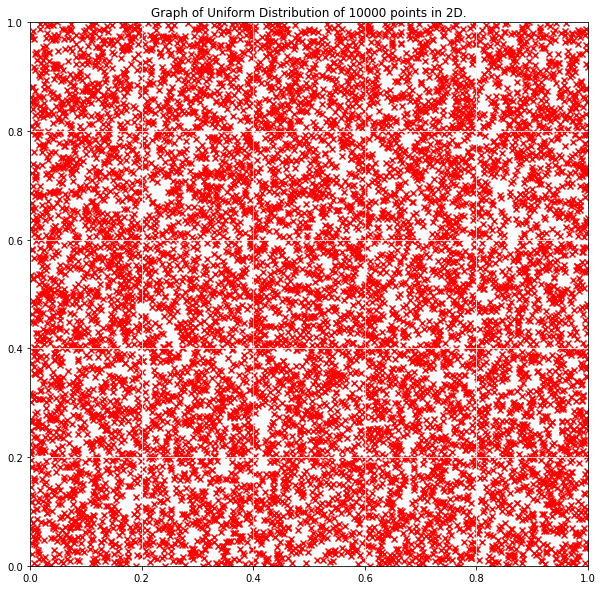

In [15]:
my_seed(0)

num_trials = 10**4       # 10**5 is too many!

def pair_test_plot(num_trials):
    pass     # your code here
    x_vals = [ list(random(num_trials)) ]             
    y_vals = [ list(random(num_trials)) ]
    plt.figure(num=None, figsize=(10, 10))
    plt.title('Graph of Uniform Distribution of '+str(num_trials)+' points in 2D.',fontsize=12)
    plt.grid(color='0.95')
    plt.ylim(0, 1)
    plt.xlim(0,1)
    plt.scatter(x_vals, y_vals,marker="x",color="r")
    plt.show()

pair_test_plot(num_trials)

###  Part (b): Testing for Randomness: Test Two -- The Period Test

In addition to spreading the random numbers uniformly over a range, another important characteristic of a pseudo-random number generator it its period: how long before the sequence begins to repeat?   
    
The <i> period </i> of a generator is how long it takes before it starts to repeat the pseudo-random sequence, i.e., the number of unique values produced.  Why does it repeat?  Well, consider the case when $a = 3$ and $m=7$ with an initial seed of 0:

$n_0=	3$<br>
$n_1=	2$<br>
$n_2=	6$<br>
$n_3=	4$<br>
$n_4=	5$<br>
$n_5=	1$<br>
$n_6=	3$<br>
$n_7=	2$<br>
$n_8=	6$

You can see that when we reach $n_6$ the sequence starts to repeat, at which point the sequence will be exactly the same again (why?). The period of this generator is $m-1 = 6$. No linear-congruential generator in the form we have given it can have a period larger than $m-1$, so this choice of a and m gives us a <i>full-period generator</i>.  Not all generators will have the full period, but we want as long a period as possible given $m$, since we do not want pseudo-random numbers to repeat before the end of our random experiment-- this does not simulate random behavior very well!

Todo: Write code to print out the period of <code>my_random_int()</code> by simply running it until you get a repeat value. Print out the period and state, yes or no, whether this is a full period generator. 

Test your code with $a = 3$ and $m=7$ to verify that it works properly, following the example above; then run
it for the larger values of $a$ and $b$ given above, thereby testing whether these give us a full-period generator. 



In [ ]:
# Solution  

my_seed(0)      # start with a seed of 0

# Your code here


a = 1 
s = my_random_int()
while(s != my_random_int()):
    a+=1
q=m-1
if a == q:
    print("true")
    

###  Part (c): Testing for Randomness: Test Three -- The Spectral Test.

For this part, we would like you to do the <i>spectral test</i>. This is essentially the same as the
tests in HW 01 where we determined whether the probability function were equinumerous; however,
now we have floating-point numbers. 

In order to do this, since these are very close to behaving like real numbers: as with uncountable sample spaces, we really only can speak about intervals, not sample points. So we need to "bin" the numbers into some suitable intervals. For any number $k$ of equal-width bins over the range, if the probability is equinumerous, we would expect the probability of a number landing in a particular bin to be very close to $\frac{1}{k}$. 

There is a subtle problem with this test and its interaction with the period: if you generate exactly as many numbers as in the period, then by definition the bins will be almost exactly the same size, since the sequence generated all possible numbers in the range [0 .. m). (You can verify this by doing $m=4194301$ trials.) Hence we do not want to generate too much of the sequence to do the spectral test. We will therefore use only $10^5$ numbers, which represent

$$\frac{10^5}{4194301} \, =\, 0.0238$$
 
or about 2% of the period. 

<strong>Todo:</strong>

Generate $10^5$ values using <code>my_random()</code>. 

Convert these floating-point numbers into integers in the range [0, ..., 100) by multiplying by 100 and then converting to an int (which will truncate the fractional part). If we histogram the sequence, we should get an approximately equinumerous distribution over the range [0, .., 100). 

Use <code>show_distribution</code> to display the result, and verify by eye that each bin is approximately equally likely. 


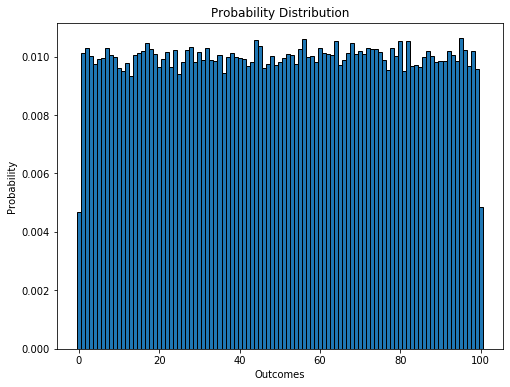

In [16]:
# Solution

num_trials = 10**5

my_seed(0)
    
# Your code here
x_vals = [my_random() for k in range(num_trials)]
y = [x*100 for x in x_vals]
l = []
for i in y:
    l.append(round(i))
show_distribution(l)

## Problem Ten: Generating random integers in a range [a, ..., b) 
Now we will investigate generating random integers in a specific range, from a (inclusive) to b (exclusive, as usual in ranges in Python); this is
equivalent to the  <code>randint(a,b)</code>:

    S = { a,       a+1,     ...., b-1 }
    P = { 1/(b-a), 1/(b-a), ...., 1/(b-a) }
    

In [17]:
# my_randint returns a random integer in range [a, b)


def my_random_range(a,b):   # returns a float
    numb =( my_random()*(b-a)+a)
    return numb
    
    # Your code here
    return 0      # just to get it to compile

# Now just convert it to an int

def my_randint(a,b):
                        # returns an int
    return (int(my_random_range(a,b)))
    # Your code here
    return 0      # just to get it to compile
    


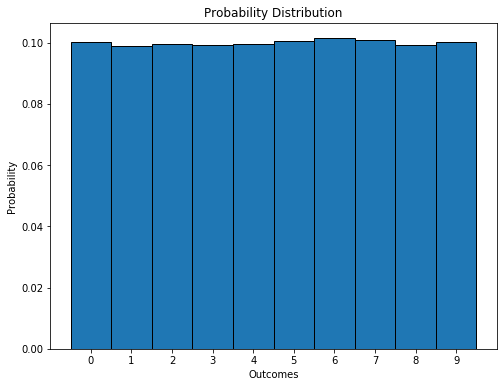

In [19]:
# Perform the spectral test on my_randint(0, 10), and draw the histogram with each bin representing each number
# This is similar to Problem Nine part (c)

my_seed(0)

num_trials = 10**5

x_vals = [my_randint(0,10) for k in range(num_trials)]
y = [x for x in x_vals]
l = []
for i in y:
    l.append(round(i))
show_distribution(l)

# Your code here


## Problem Eleven:  Display an Experimental Distribution

For this problem, provide code which will display the probability distribution for the experiment of running the "flip a coin until you get a head" experiment 100,000 times.

Hint:  when the sample space is countably infinite, you may generate some very large values!
For the purposes of this problem, define <code>upper_bound = 100</code>; when
generating values, if the value is over this bound, return the bound, e.g., if you generate 103, return 100.  

In [3]:
# Solution

upper_bound = 100
times = 100000

outcomes = []

for i in range(times):
    result = 0
    number_flips = 0
    while result == 0 & number_flips < 100:
        result = my_randint(0,2)
        number_flips += 1
    outcomes.append(number_flips)

show_distribution(outcomes)
    


NameError: name 'my_randint' is not defined

## Problem Twelve:  

Verify the result you calculated for Problem 4 above (the "flip until heads" experiment returns an odd number)
by running 10,000 trials. The answer should be close to the result obtained by your mathematical analysis. 

Do NOT show the distribution of the random experiment (you did that in the previous problem), instead print out the results as a bar chart (using show_distribution) showing the probabilities for
the two results, either an even or odd number. There will be only two bins (like when you show the result of flipping a single coin.)  In order to use <code>draw_distribution(...)</code>, you will need <code>Rx</code> to be a list of integers (such as <code>[0,1]</code>),
but then you can provide your own text labels. Use labels "Even" and "Odd". 

Hint: When a trial generates a number, it is a simple operation to turn all odds into 1 and evens into 0. Be sure to look at the function <code>draw_distribution(...)</code> in the first cell, noting how to use strings to label the x axis. 

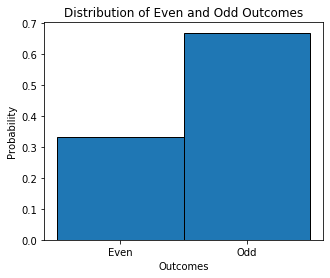

In [23]:
# Solution

# Your code here

even_count, odd_count = 0, 0
  
# iterating number
for num in outcomes: 
    if num % 2 == 0: 
        even_count += 1
    else: 
        odd_count += 1

odd_probability = (odd_count)/(even_count + odd_count)
even_probability = (even_count)/(even_count + odd_count)

draw_distribution([0,1], [even_probability,odd_probability],"Distribution of Even and Odd Outcomes", ['Even','Odd'],(5,4))